In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from collections import defaultdict
from KP import KnapsackProblem

import math
import time

## Dynamic Programming Algorithm Comparisons

Notebook code for comparing the time and accuracy of the standard dynamic programming solution to the KP and the dynamic-programming-like calculation of the exact partition function

Compared algorithms

- **Dynamical Programming Solution:**(`knapsack_dpV`)  Standard iterative solution to the problem which involves storing sub-problem solutions in matrix elements

- **Exact Partition Function:**(`exact_z_algorithm`)  Algorithm that uses dynamical programming to compute partition function and then from partition function compute the solution 

### Main Calculation

We now investigate how these accuracies vary as we change the number of items. We will ignore the brute force algorithm since it is so slow and take the dynamical programming solution to be our baseline of comparison (because it is exact). 

In [2]:
# test instance
KP_test = KnapsackProblem(weights = [1], values = [1], limit = 1)

# dictionary of algorithm names and functions
algo_name_dict = {'DP': KP_test.knapsack01_dpV,
                  'ExactZ': KP_test.exact_z_algorithm}


for k, v in algo_name_dict.items():
    print(k)

DP
ExactZ


In [3]:
# max power
power = 11

# print intermediate results
verbose = True

# number of elements
nelem_list = [2**k for k in range(3, power)]

# defining default dictionaries
time_list_name_dict = defaultdict(lambda: list())
v_ratio_list_name_dict = defaultdict(lambda: list())
limit_list = list()
limit_sat_list_name_dict = defaultdict(lambda: list())

# start clock
start_clock0 = time.time()

for m in range(len(nelem_list)):
    
    # getting element
    nelem = nelem_list[m]
    
    # set seed
    np.random.seed(42)

    # Randomly choose the weight of each object
    weight_vec = np.random.randint(1,100,nelem)
    value_vec = np.random.randint(1,100,nelem)
    
    # Defining Weight Limit as the average of the weights of 
    # randomly chosen objects
    empt_list = []
    for _ in range(10):
        empt_list.append(np.dot(np.random.randint(0,2,nelem), weight_vec))
    Wlimit = int(np.mean(empt_list))   
    limit_list.append(Wlimit)
    
    # knapsack instance
    KP_init = KnapsackProblem(weights = weight_vec, values = value_vec, limit = Wlimit)
    
    # dictionary of algorithm names and functions
    algo_name_dict = {'DP': KP_init.knapsack01_dpV,
                  'ExactZ': KP_init.exact_z_algorithm}   
    
    if verbose:
        print('## N = %s' % str(nelem))
        print('## Weight Limit: %.3f' % Wlimit)
        print('---')
        print('---')
              
    
    for name, algo in algo_name_dict.items():
        
        # finding solution and computing time    
        start_clock = time.time()   
        soln = algo()
            
        time_list_name_dict[name].append(time.time()-start_clock)        
    
        if name == 'DP':
            true_value = np.dot(soln, value_vec)

        # adding accuracy 
        v_ratio_list_name_dict[name].append(np.dot(soln, value_vec)/true_value)  
        limit_sat_list_name_dict[name].append(np.dot(soln, weight_vec)<Wlimit)  
        
        if verbose: 
            print('%s V_soln/V_exact: %.3f' % (name, np.dot(soln, value_vec)/true_value))
            print('%s Weight: %.3f' % (name, np.dot(soln, weight_vec)))
            print('%s computation time: %.3f' % (name, time_list_name_dict[name][-1]))
            print('---')
            
    if verbose: 
        print('Done with Round #%i!' % (m+1))
        print('Total elapsed time so far: %.3f sec' % (time.time()-start_clock0))
        print('')
        print('')

## N = 8
## Weight Limit: 287.000
---
---
DP V_soln/V_exact: 1.000
DP Weight: 264.000
DP computation time: 0.001
---
ExactZ V_soln/V_exact: 1.000
ExactZ Weight: 264.000
ExactZ computation time: 0.014
---
Done with Round #1!
Total elapsed time so far: 0.015 sec


## N = 16
## Weight Limit: 416.000
---
---
DP V_soln/V_exact: 1.000
DP Weight: 403.000
DP computation time: 0.002
---
ExactZ V_soln/V_exact: 1.000
ExactZ Weight: 403.000
ExactZ computation time: 0.041
---
Done with Round #2!
Total elapsed time so far: 0.059 sec


## N = 32
## Weight Limit: 850.000
---
---
DP V_soln/V_exact: 1.000
DP Weight: 843.000
DP computation time: 0.009
---
ExactZ V_soln/V_exact: 1.000
ExactZ Weight: 843.000
ExactZ computation time: 0.194
---
Done with Round #3!
Total elapsed time so far: 0.261 sec


## N = 64
## Weight Limit: 1643.000
---
---
DP V_soln/V_exact: 1.000
DP Weight: 1636.000
DP computation time: 0.035
---
ExactZ V_soln/V_exact: 1.000
ExactZ Weight: 1636.000
ExactZ computation time: 0.741
---
D

## Plots

### Accuracy vs $N$

In [4]:
# dictionary of algorithm names and functions
marker_name_dict = {'DP': 's',  
                    'ExactZ': 'X'}

# dictionary of algorithm names and functions
color_name_dict = {'DP': 'purple',  
                    'ExactZ': 'blue'}

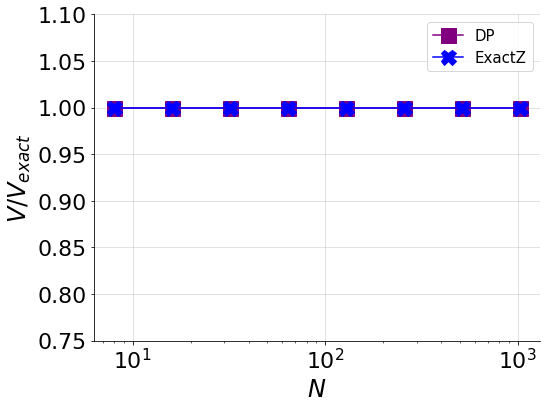

In [13]:
plt.figure(figsize = (8,6))

ax = plt.subplot(111)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for name, v_ratio in v_ratio_list_name_dict.items():
    if name == 'Brute':
        nums = [8, 16]
        
        plt.plot(nums, v_ratio, marker = marker_name_dict[name], color = color_name_dict[name], linestyle = '-',  markersize = 15, label = r'%s' % name)
    else:
        nums = nelem_list
        plt.plot(nums, v_ratio, marker = marker_name_dict[name], color = color_name_dict[name], linestyle = '-', label = r'%s' % name, markersize = 15)

plt.grid(alpha = 0.45)
plt.xlabel(r'$N$', fontsize = 24)
plt.xscale('log')
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.ylabel(r'$V/V_{exact}$', fontsize = 24)
plt.legend(loc = 'best', fontsize = 15)

plt.ylim([.75, 1.10])

# plt.savefig('/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/2020_largeN_knapsack_problem/LaTeX_JStatPhys/vratio_vs_num_easykp_new.png', dpi = 100, bbox_inches='tight' )

plt.show()

### Time vs $N$

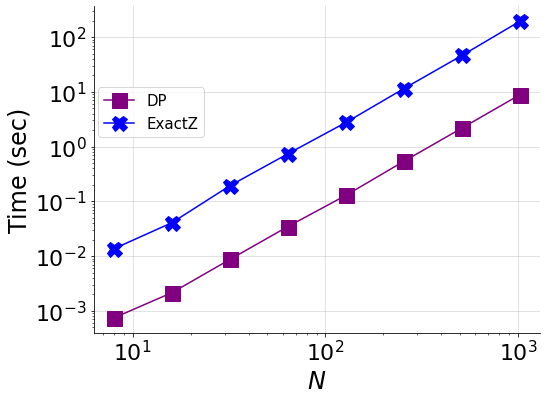

In [12]:
plt.figure(figsize = (8,6))

ax = plt.subplot(111)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for name, time_ in time_list_name_dict.items():
    if name == 'Brute':
        nums = [8, 16]
        
        plt.loglog(nums, np.array(time_), marker_name_dict[name], color = color_name_dict[name],linestyle = '-',  markersize = 15, label = r'%s' % name)
    else:
        nums = nelem_list
        plt.loglog(nums, np.array(time_), marker_name_dict[name], color = color_name_dict[name],linestyle = '-', label = r'%s' % name, markersize = 15)


plt.grid(alpha = 0.45)
plt.xlabel(r'$N$', fontsize = 24)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.ylabel(r'Time (sec)', fontsize = 24)
plt.legend(loc = (.01,.6), fontsize = 15)

# plt.savefig('/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/2020_largeN_knapsack_problem/LaTeX_JStatPhys/time_vs_num_easykp_new.png', dpi = 100, bbox_inches='tight' )

plt.show()

### Rate vs Accuracy

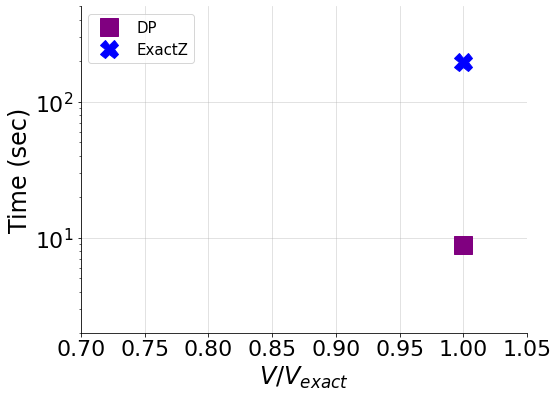

In [20]:
## accuracy-time scatter plot

plt.figure(figsize = (8,6))

ax = plt.subplot(111)

for name, _ in v_ratio_list_name_dict.items():
    v_ratio = v_ratio_list_name_dict[name][-1]
    time_ = time_list_name_dict[name][-1]
    if name == 'Brute':
        continue
    else:

        plt.plot([v_ratio], [time_], marker_name_dict[name], color = color_name_dict[name], label = r'%s' % name, markersize = 18)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.grid(alpha = 0.45)
plt.xlabel(r'$V/V_{exact}$', fontsize = 24)
plt.yscale('log')
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.ylabel(r'Time (sec)', fontsize = 24)
plt.legend(loc ='best', fontsize = 15)
plt.xlim(.7,1.05)
plt.ylim(2,500)

# plt.savefig('/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/2020_largeN_knapsack_problem/LaTeX_JStatPhys/time_vs_vratio_easykp_new.png', dpi = 100, bbox_inches='tight' )

plt.show()